In [20]:
# Importing necessary libraries
import pandas as pd

# Load the dataset
df = pd.read_csv('twitter_train.csv')

# Display basic information about the dataset
df.info()

# Preview the dataset
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet id       74682 non-null  int64 
 1   entity         74682 non-null  object
 2   sentiment      74682 non-null  object
 3   tweet content  73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


,Tweet id,entity,sentiment,tweet content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [6]:
import nltk

# Download stopwords
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\arun7\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [9]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re

# Download stopwords (this will fix your error)
nltk.download('stopwords')
nltk.download('punkt')  # Download tokenizer data as well

# Set of English stopwords
stop_words = set(stopwords.words('english'))

# Define a text preprocessing function
def preprocess_text(text):
    # Remove URLs, mentions, and hashtags
    text = re.sub(r"http\S+|www\S+|https\S+|@\S+|#\S+", '', text, flags=re.MULTILINE)
    # Convert to lowercase
    text = text.lower()
    # Remove special characters and numbers
    text = re.sub(r'\W+|\d+', ' ', text)
    # Tokenize the text
    words = word_tokenize(text)
    # Remove stopwords
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)

# Ensure that 'tweet content' column is treated as a string and fill NaN values with an empty string
df['tweet content'] = df['tweet content'].fillna('').astype(str)

# Now apply the preprocessing function
df['cleaned_tweet_content'] = df['tweet content'].apply(preprocess_text)

# Preview the cleaned data
df[['tweet content', 'cleaned_tweet_content']].head()



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\arun7\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\arun7\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,tweet content,cleaned_tweet_content
0,im getting on borderlands and i will murder yo...,im getting borderlands murder
1,I am coming to the borders and I will kill you...,coming borders kill
2,im getting on borderlands and i will kill you ...,im getting borderlands kill
3,im coming on borderlands and i will murder you...,im coming borderlands murder
4,im getting on borderlands 2 and i will murder ...,im getting borderlands murder


In [11]:
import nltk

# Download the VADER lexicon
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\arun7\AppData\Roaming\nltk_data...


True

In [12]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download the VADER lexicon (this will fix the error)
nltk.download('vader_lexicon')

# Initialize VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Example: Apply VADER to analyze sentiment on cleaned text
df['sentiment_score'] = df['cleaned_tweet_content'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Preview the sentiment scores
df[['cleaned_tweet_content', 'sentiment_score']].head()


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\arun7\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,cleaned_tweet_content,sentiment_score
0,im getting borderlands murder,-0.6908
1,coming borders kill,-0.6908
2,im getting borderlands kill,-0.6908
3,im coming borderlands murder,-0.6908
4,im getting borderlands murder,-0.6908


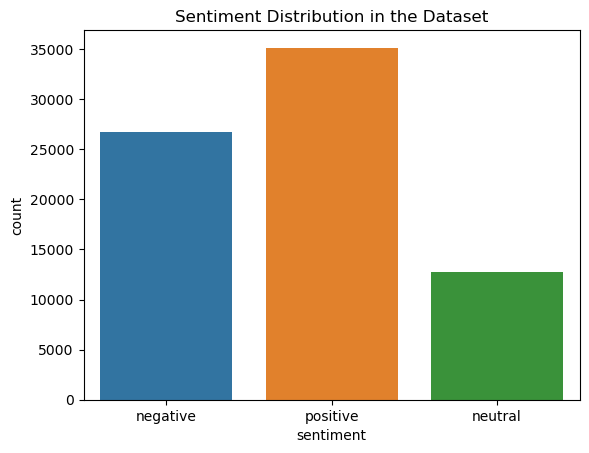

In [14]:
# Categorize sentiment score into positive, neutral, and negative
df['sentiment'] = df['sentiment_score'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))

# Plot the sentiment distribution
import seaborn as sns
import matplotlib.pyplot as plt

# Countplot for sentiment distribution
sns.countplot(x='sentiment', data=df)
plt.title('Sentiment Distribution in the Dataset')
plt.show()


In [17]:
!pip install wordcloud



  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/f5/b0/247159f61c5d5d6647171bef84430b7efad4db504f0229674024f3a4f7f2/wordcloud-1.9.3-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   --------- ----------------------------- 71.7/300.2 kB 975.2 kB/s eta 0:00:01
   ---------------------------------------- 300.2/300.2 kB 2.6 MB/s eta 0:00:00


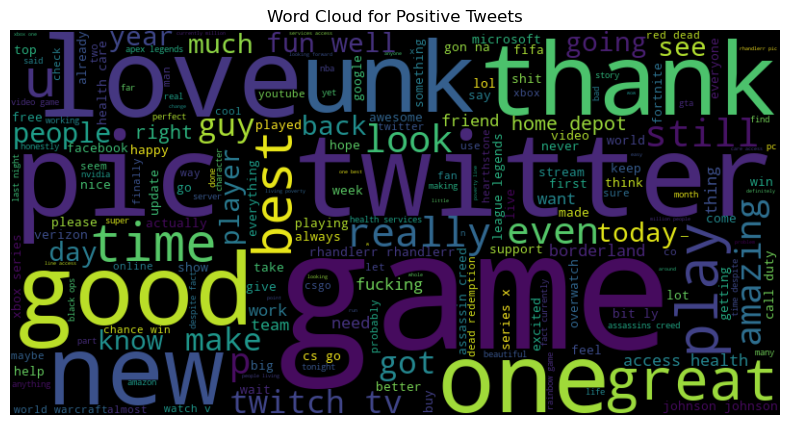

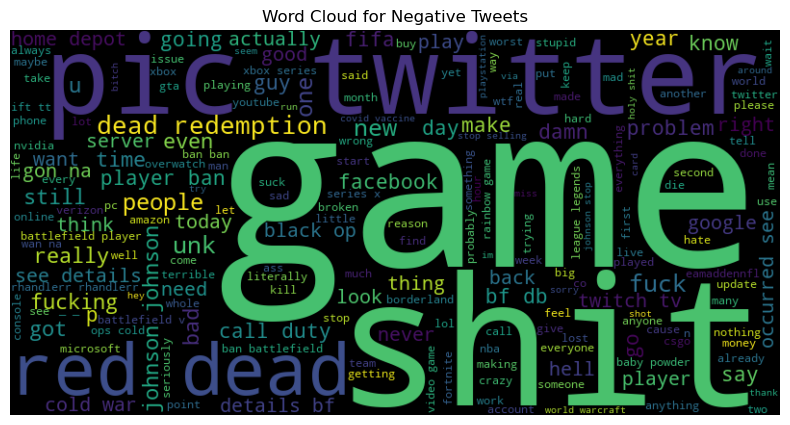

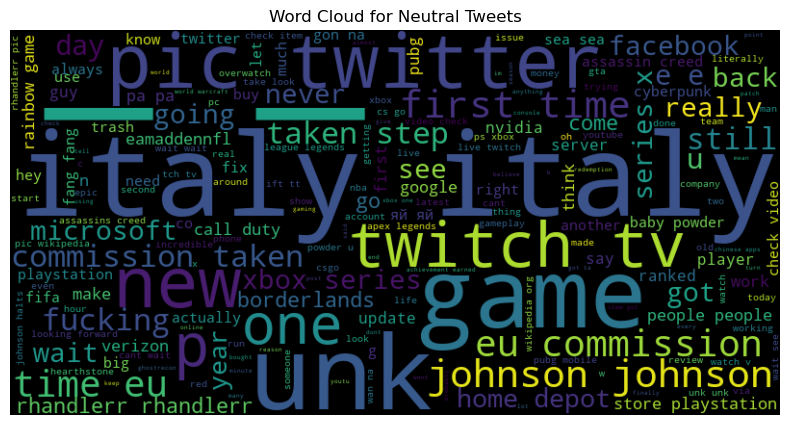

In [18]:
from wordcloud import WordCloud

# Generate word clouds for positive, negative, and neutral tweets
positive_tweets = ' '.join(df[df['sentiment'] == 'positive']['cleaned_tweet_content'])
negative_tweets = ' '.join(df[df['sentiment'] == 'negative']['cleaned_tweet_content'])
neutral_tweets = ' '.join(df[df['sentiment'] == 'neutral']['cleaned_tweet_content'])

# Word Cloud for Positive Sentiment
wordcloud_pos = WordCloud(width=800, height=400).generate(positive_tweets)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Tweets')
plt.show()

# Word Cloud for Negative Sentiment
wordcloud_neg = WordCloud(width=800, height=400).generate(negative_tweets)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Negative Tweets')
plt.show()

# Word Cloud for Neutral Sentiment
wordcloud_neu = WordCloud(width=800, height=400).generate(neutral_tweets)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud_neu, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Neutral Tweets')
plt.show()


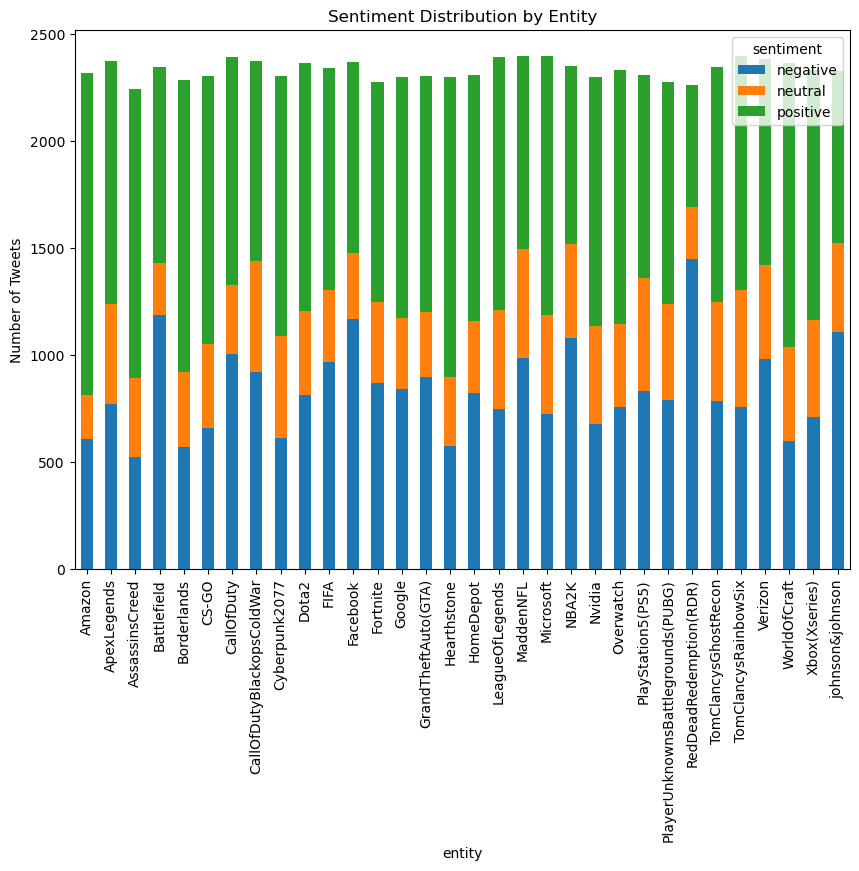

In [19]:
# Group sentiment by entity to see how each entity is viewed
entity_sentiment = df.groupby(['entity', 'sentiment']).size().unstack().fillna(0)

# Plot sentiment distribution for entities
entity_sentiment.plot(kind='bar', stacked=True, figsize=(10,7))
plt.title('Sentiment Distribution by Entity')
plt.ylabel('Number of Tweets')
plt.show()
